# K MEANS

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# DATA PREP

In [ ]:
df = csv_file_path = 'train.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
df.head()

,text,summary
0,The method of obtaining new integrable coupl...,Enlarged spectral problems and nonintegrability
1,The Open Science Collaboration recently repo...,Recent reproducibility estimates indicate that...
2,Inter-Prediction is used effectively in mult...,Improvements of Motion Estimation and Coding u...
3,Proton-proton collision data recorded in 201...,Observation of the ${B^0 \to \rho^0 \rho^0}$ d...
4,We give some higher dimensional analogues of...,"Multipartitions, Generalized Durfee Squares an..."


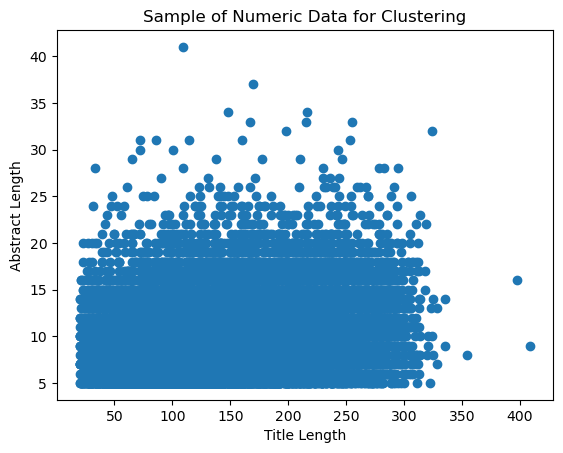

In [ ]:
import matplotlib.pyplot as plt
# Feature extraction
df['text_length'] = df['text'].apply(lambda x: len(x.split()))
df['summary_length'] = df['summary'].apply(lambda x: len(x.split()))
# Visualize the data
plt.scatter(df['text_length'], df['summary_length'])
plt.xlabel('Title Length')
plt.ylabel('Abstract Length')
plt.title('Sample of Numeric Data for Clustering')
plt.show()

In [ ]:
# Feature selection
features = df[['text_length', 'summary_length']]

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
features.head()

,text_length,summary_length
0,50,5
1,109,14
2,251,9
3,134,17
4,38,9


# ELBOW METHOD

In [ ]:
# Calculate distortion for a range of cluster values
k_values = [2, 3, 4]
distortions = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    distortions.append(kmeans.inertia_)
    print(f"For k={k}, Elbow Score: {kmeans.inertia_}")




For k=2, Elbow Score: 28931.385145596763
For k=3, Elbow Score: 19738.54508587339
For k=4, Elbow Score: 15440.886487426


## VISUALIZATION

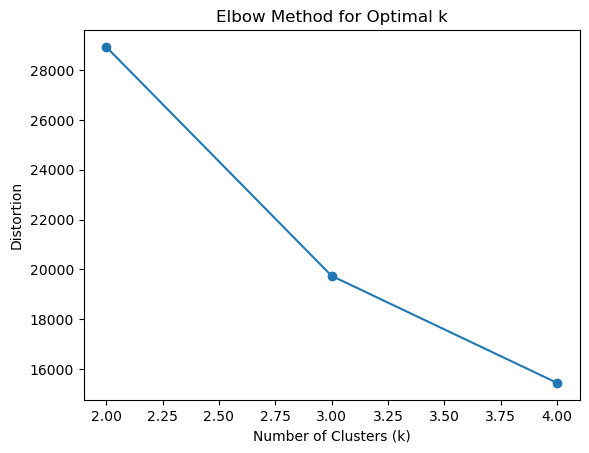

In [ ]:
# Plot the elbow graph
plt.plot(k_values, distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

In this case, it appears that there is a significant reduction in distortion from k=2 to k=3, but the reduction is less pronounced from k=3 to k=4. Therefore, k=3 might be a reasonable choice based on the elbow method.

# SILHOUTTE METHOD

In [ ]:
from sklearn.metrics import silhouette_score


k_values = [2, 3, 4]
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    df[f'k_cluster_{k}'] = kmeans.fit_predict(features_scaled)
    # Silhouette score
    silhouette_avg = silhouette_score(features_scaled, df[f'k_cluster_{k}'])
    silhouette_scores.append(silhouette_avg)
    print(f"For k={k}, Silhouette Score: {silhouette_avg}")



For k=2, Silhouette Score: 0.3733515900769001
For k=3, Silhouette Score: 0.3798127164299102
For k=4, Silhouette Score: 0.35693020502062656


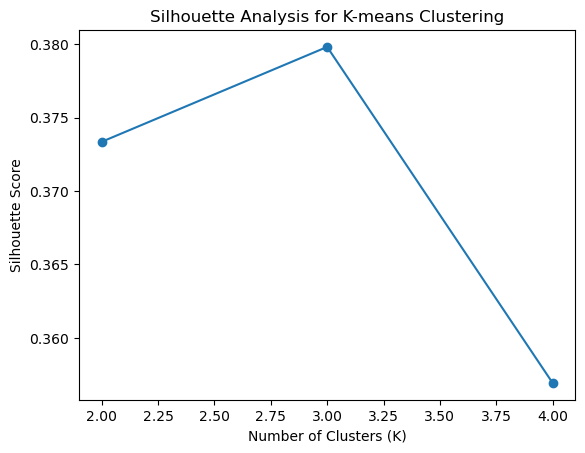

In [ ]:
# Plot silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for K-means Clustering')
plt.show()

In [ ]:
df.head()

,text,summary,text_length,summary_length,k_cluster_2,k_cluster_3,k_cluster_4
0,The method of obtaining new integrable coupl...,Enlarged spectral problems and nonintegrability,50,5,0,1,2
1,The Open Science Collaboration recently repo...,Recent reproducibility estimates indicate that...,109,14,1,2,1
2,Inter-Prediction is used effectively in mult...,Improvements of Motion Estimation and Coding u...,251,9,1,0,3
3,Proton-proton collision data recorded in 201...,Observation of the ${B^0 \to \rho^0 \rho^0}$ d...,134,17,1,2,0
4,We give some higher dimensional analogues of...,"Multipartitions, Generalized Durfee Squares an...",38,9,0,1,2


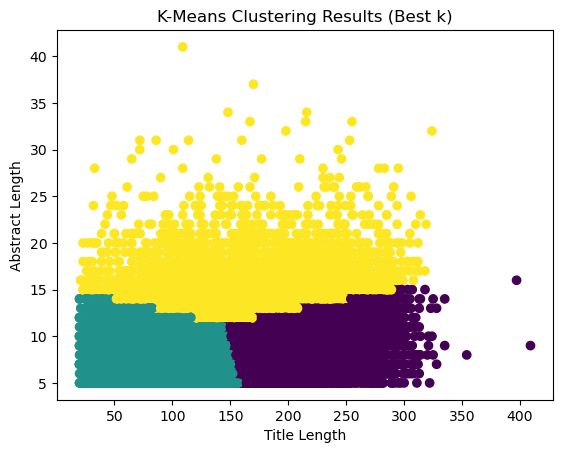

In [ ]:
# Visualize k-means clusters for the best k

plt.scatter(df['text_length'], df['summary_length'], c=df['k_cluster_3'], cmap='viridis')
plt.xlabel('Title Length')
plt.ylabel('Abstract Length')
plt.title('K-Means Clustering Results (Best k)')
plt.show()
